# Análise por município

    * Ranking dos municipios por quantidade de licitações feitas.
    * Ranking dos municipios por valor total das licitações (soma de todos os valores).
    * Ranking das licitações de maior valor.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lic = pd.read_csv("licitacao.txt", sep="|", dtype={'cd_ugestora': str,'de_ugestora': str,'nu_licitacao': str,
                                                   'tp_licitacao': float,'de_tipolicitacao': str, 'dt_homologacao': str, 
                                                   'tp_objeto': str,'de_tipoobjeto': str, 'vl_licitacao': float,'de_obs': str}, engine='python', error_bad_lines=False, encoding = 'utf8')
jur = pd.read_csv("jurisdicionado.csv", dtype={'codigo_sagres': str})

Skipping line 144111: '|' expected after '"'
Skipping line 188932: '|' expected after '"'
Skipping line 198432: '|' expected after '"'


In [3]:
lic_mun = pd.merge(lic, jur, left_on="de_ugestora", right_on="nome", how="left").dropna()
lic_mun

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs,...,poder,tipojurisdicionado_fk,localidade_fk,nome,codigo_sagres,previdenciario,municipio_importacao,tramita_id,cancelled,esfera
0,101052,Câmara Municipal de Capim,000022013,8.0,Inexigível,07/02/2013,2.0,Compras e Serviços,24000.00,Prestacao de servicos juridicos em forma de as...,...,2.0,3.0,1435.0,Câmara Municipal de Capim,101052,False,Capim,71.0,False,1.0
1,101053,Câmara Municipal de Caraúbas,000012016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,30000.00,CONTRATACAO DOS SERVICOS ADVOCATICIOS,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
2,101053,Câmara Municipal de Caraúbas,000012016,11.0,Pregão Presencial,25/07/2016,2.0,Compras e Serviços,5727.00,AQUISICAO DE APARELHOS DE AR CONDICIONADO,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
3,101053,Câmara Municipal de Caraúbas,000022016,8.0,Inexigível,08/01/2016,2.0,Compras e Serviços,32400.00,CONTRATACAO DOS SERVICOS DE CONTABILIDADE,...,2.0,3.0,1361.0,Câmara Municipal de Caraúbas,101053,False,Caraúbas,72.0,False,1.0
4,101055,Câmara Municipal de Casserengue,000012012,2.0,Tomada de Preços,13/06/2012,2.0,Compras e Serviços,13650.00,AQUISIÇÃO DE COMBUSTIVEL.,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
5,101055,Câmara Municipal de Casserengue,000012012,3.0,Convite,03/04/2012,2.0,Compras e Serviços,22500.00,LOCAÇÃO DE VEÍCULO DESTINADO A DISPOSIÇÃO DA C...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
6,101055,Câmara Municipal de Casserengue,000012015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE PROFISSIONAL COM NOTORIA ESPECI...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
7,101055,Câmara Municipal de Casserengue,000012015,11.0,Pregão Presencial,01/04/2015,2.0,Compras e Serviços,9900.00,AQUISICAO PARCELADA DE COMBUSTIVEL (GASOLINA) ...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
8,101055,Câmara Municipal de Casserengue,000022015,8.0,Inexigível,13/03/2015,2.0,Compras e Serviços,26400.00,CONTRATACAO DE SERVICOS ESPECIALIZADOS CONTABE...,...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0
9,101055,Câmara Municipal de Casserengue,000022015,11.0,Pregão Presencial,22/04/2015,2.0,Compras e Serviços,32400.00,"LOCACAO DE VEICULO COM MOTORISTA, PARA ATENDER...",...,2.0,3.0,1381.0,Câmara Municipal de Casserengue,101055,False,Casserengue,74.0,False,1.0


Text(0.5, 0, 'Quantidade de licitações')

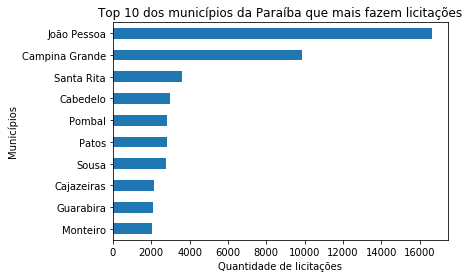

In [4]:
#Ranking dos municípios por quantidade de licitações feitas
licfeitas = lic_mun['municipio_importacao'].value_counts()[:10]
licfeitas.plot(kind='barh').invert_yaxis()
plt.title("Top 10 dos municípios da Paraíba que mais fazem licitações")
plt.ylabel('Municípios')
plt.xlabel('Quantidade de licitações')

In [5]:
licfeitas

João Pessoa       16629
Campina Grande     9839
Santa Rita         3625
Cabedelo           2982
Pombal             2837
Patos              2826
Sousa              2758
Cajazeiras         2150
Guarabira          2082
Monteiro           2017
Name: municipio_importacao, dtype: int64

Text(0.5, 0, 'Soma das Licitações')

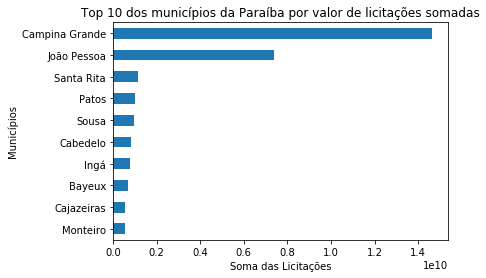

In [4]:
#Ranking dos municípios por valor total das licitações
qtd_ugestora = lic_mun.groupby(['municipio_importacao'])['vl_Licitacao'].sum() 
qtd_ug = qtd_ugestora.sort_values(ascending=False)[:10]  
qtd_ug.plot(kind='barh', x='municipio_importacao', y='vl_Licitacao').invert_yaxis()
plt.title("Top 10 dos municípios da Paraíba por valor de licitações somadas")
plt.ylabel('Municípios')
plt.xlabel('Soma das Licitações')

In [5]:
qtd_ug

municipio_importacao
Campina Grande    1.462702e+10
João Pessoa       7.380778e+09
Santa Rita        1.155780e+09
Patos             1.016743e+09
Sousa             9.719838e+08
Cabedelo          8.160674e+08
Ingá              7.963493e+08
Bayeux            6.821499e+08
Cajazeiras        5.745762e+08
Monteiro          5.477116e+08
Name: vl_Licitacao, dtype: float64

In [9]:
teste = qtd_ug.to_frame()
teste

,vl_Licitacao
municipio_importacao,
Campina Grande,1.462702e+10
João Pessoa,7.380778e+09
Santa Rita,1.155780e+09
Patos,1.016743e+09
Sousa,9.719838e+08
Cabedelo,8.160674e+08
Ingá,7.963493e+08
Bayeux,6.821499e+08
Cajazeiras,5.745762e+08


In [11]:
teste.to_csv('output.csv')

In [12]:
teste.to_json('output.json')

Text(0.5, 0, 'Valor das licitações')

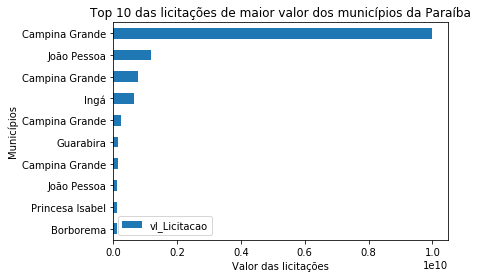

In [10]:
#Ranking das licitações de maior valor
valor_licitacao = lic_mun.nlargest(10, ['vl_Licitacao'])
valor_licitacao.plot(kind='barh', x='municipio_importacao', y='vl_Licitacao').invert_yaxis()
plt.title("Top 10 das licitações de maior valor dos municípios da Paraíba")
plt.ylabel('Municípios')
plt.xlabel('Valor das licitações')

In [11]:
valor_licitacao

,cd_ugestora,de_ugestora,nu_Licitacao,tp_Licitacao,de_TipoLicitacao,dt_Homologacao,tp_Objeto,de_TipoObjeto,vl_Licitacao,de_Obs,...,poder,tipojurisdicionado_fk,localidade_fk,nome,codigo_sagres,previdenciario,municipio_importacao,tramita_id,cancelled,esfera
33952,201050,Prefeitura Municipal de Campina Grande,000092012,1.0,Concorrência,19/10/2012,1.0,Obras e Serviços de engenharia,9.979587e+09,"OBRAS DE DRENAGEM PLUVIAL, MACRODRENAGEM DA CA...",...,1.0,9.0,1413.0,Prefeitura Municipal de Campina Grande,201050,False,Campina Grande,635.0,False,1.0
185514,304095,Autarquia Especial Municipal de Limpeza Urbana...,000012013,1.0,Concorrência,17/01/2014,1.0,Obras e Serviços de engenharia,1.190530e+09,"Contratação de empesas de engenharia,especiali...",...,1.0,2.0,1457.0,Autarquia Especial Municipal de Limpeza Urbana...,304095,False,João Pessoa,13.0,False,1.0
158185,601050,Fundo Municipal de Saúde de Campina Grande,167472017,11.0,Pregão Presencial,25/01/2018,2.0,Compras e Serviços,7.959275e+08,"AQUISICAO DE FIOS CIRURGICOS, PARA ATENDER AS...",...,1.0,6.0,1413.0,Fundo Municipal de Saúde de Campina Grande,601050,False,Campina Grande,412.0,False,1.0
62558,201088,Prefeitura Municipal de Ingá,000032018,12.0,Adesão a Registro de Preço,07/05/2018,2.0,Compras e Serviços,6.540010e+08,"AQUISICAO DE MATERIAL MEDICO-HOSPITALAR, PARA ...",...,1.0,9.0,1422.0,Prefeitura Municipal de Ingá,201088,False,Ingá,674.0,False,1.0
36183,201050,Prefeitura Municipal de Campina Grande,000352006,8.0,Inexigível,13/12/2006,2.0,Compras e Serviços,2.378368e+08,SERVIÇOS ADVOCATICIIOS CONSISTENTES NA INTERPO...,...,1.0,9.0,1413.0,Prefeitura Municipal de Campina Grande,201050,False,Campina Grande,635.0,False,1.0
158275,601082,Fundo Municipal de Saúde de Guarabira,000062009,11.0,Pregão Presencial,01/04/2009,2.0,Compras e Serviços,1.678350e+08,AQUISICAO DE MATERIAL MEDICO HOSPITALAR.,...,1.0,6.0,1404.0,Fundo Municipal de Saúde de Guarabira,601082,False,Guarabira,7029.0,False,1.0
34749,201050,Prefeitura Municipal de Campina Grande,000022013,2.0,Tomada de Preços,14/08/2013,1.0,Obras e Serviços de engenharia,1.558481e+08,"RECUPERAÇÃO DA BIBLIOTECA CENTRAL,NO MUNICÍPIO...",...,1.0,9.0,1413.0,Prefeitura Municipal de Campina Grande,201050,False,Campina Grande,635.0,False,1.0
185084,304095,Autarquia Especial Municipal de Limpeza Urbana...,000022007,1.0,Concorrência,26/03/2008,2.0,Compras e Serviços,1.355629e+08,Valor Contratação de empresa de engenharia esp...,...,1.0,2.0,1457.0,Autarquia Especial Municipal de Limpeza Urbana...,304095,False,João Pessoa,13.0,False,1.0
103251,201153,Prefeitura Municipal de Princesa Isabel,000082013,11.0,Pregão Presencial,02/06/2013,2.0,Compras e Serviços,1.352571e+08,Aquisição de Medicamentos,...,1.0,9.0,1320.0,Prefeitura Municipal de Princesa Isabel,201153,False,Princesa Isabel,739.0,False,1.0
28106,201035,Prefeitura Municipal de Borborema,000012010,12.0,Adesão a Registro de Preço,01/09/2010,2.0,Compras e Serviços,1.230000e+08,AQUISIÇAO DE 01 VEICULO AUTOMOTOR DENTRO DO PR...,...,1.0,9.0,1394.0,Prefeitura Municipal de Borborema,201035,False,Borborema,620.0,False,1.0
